In [1]:
# FUTURE_DS_01 - Social Media Trend Analysis
# Intern: Bhargab Jyoti Bhuyan

# 1. Import Libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob
from plotly import graph_objects as go
from plotly.express import sunburst
from sklearn.feature_extraction.text import CountVectorizer
from google.colab import files




In [5]:
# 2. Upload CSV File
from google.colab import files
uploaded = files.upload()

# Extract filename from the uploaded dict
filename = list(uploaded.keys())[0]

# Now read the CSV using the filename
df = pd.read_csv(filename)



Saving sentimentdataset.csv to sentimentdataset (3).csv


In [7]:
# 3. Clean Text Column
def clean_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r"@\w+", '', text)
    text = re.sub(r"#\w+", '', text)
    text = re.sub(r"[^a-zA-Z0-9\s]", '', text)
    text = text.lower()
    return text

In [8]:
df['cleaned_text'] = df['Text'].apply(clean_text)

In [9]:
# 4. Sentiment Analysis
df['sentiment'] = df['cleaned_text'].apply(lambda x: TextBlob(x).sentiment.polarity)

def sentiment_label(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_label'] = df['sentiment'].apply(sentiment_label)

In [10]:
# 5. Topic Extraction
top_topics = df['cleaned_text'].str.split().explode().value_counts().head(10).index.tolist()
df['topic'] = df['cleaned_text'].apply(lambda x: next((word for word in x.split() if word in top_topics), None))

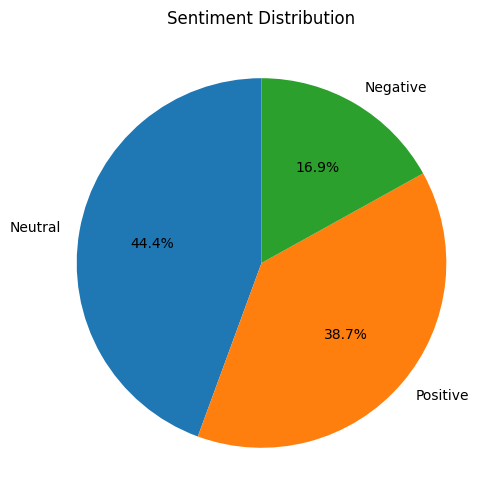

In [11]:
# 6. Visualizations

## Pie Chart - Sentiment Distribution
sentiment_dist = df['sentiment_label'].value_counts()
fig, ax = plt.subplots(figsize=(6, 6))
sentiment_dist.plot(kind='pie', autopct='%1.1f%%', startangle=90, ax=ax)
ax.set_title('Sentiment Distribution')
plt.ylabel('')
plt.show()


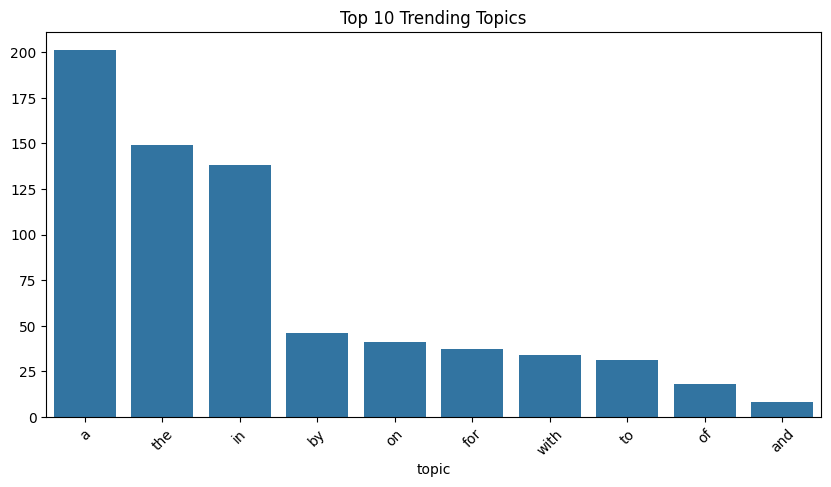

In [12]:
## Bar Chart - Top 10 Trending Topics
topic_dist = df['topic'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=topic_dist.index, y=topic_dist.values)
plt.title('Top 10 Trending Topics')
plt.xticks(rotation=45)
plt.show()

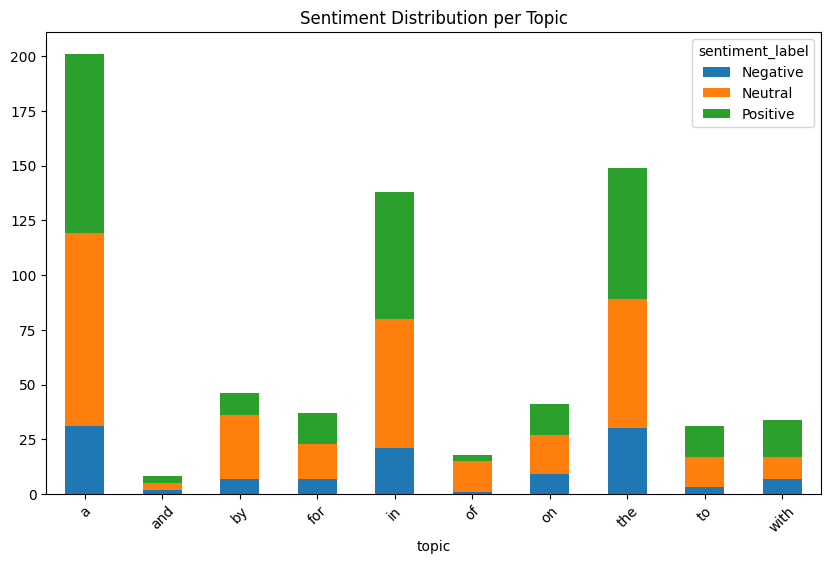

In [13]:
## Stacked Bar - Sentiment per Topic
topic_sentiment = df.groupby('topic')['sentiment_label'].value_counts().unstack().fillna(0)
topic_sentiment.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Sentiment Distribution per Topic')
plt.xticks(rotation=45)
plt.show()


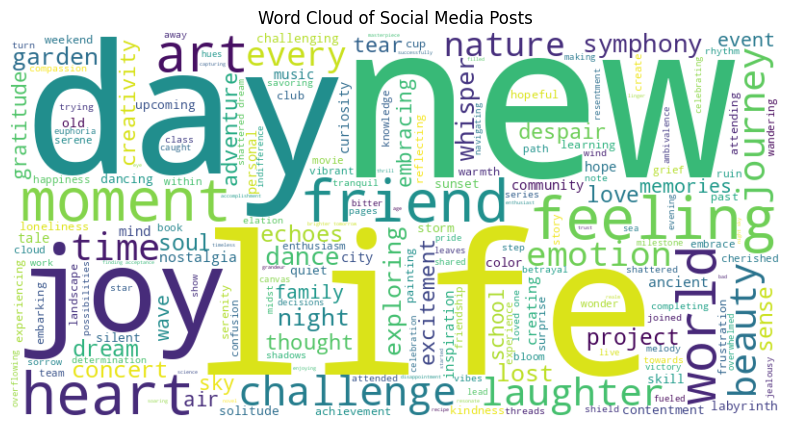

In [14]:
## Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['cleaned_text']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Social Media Posts')
plt.show()

In [15]:
## Sunburst Chart
sunburst_data = df.groupby(['sentiment_label', 'topic']).size().reset_index(name='counts')
fig = sunburst(sunburst_data, path=['sentiment_label', 'topic'], values='counts')
fig.update_layout(title="Sentiment Distribution by Topic")
fig.show()


In [16]:
## Optional: Export Processed Data
df.to_csv("processed_sentiment_data.csv", index=False)
files.download("processed_sentiment_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>